# WEEK 2 PART 2

Name: MUSA T GANIYU

Course: DATA 620 (Web Analytics)

Assignment Week : 2

Instruction:

Centrality measures can be used to predict (positive or negative) outcomes for a node.

Your task in this week’s assignment is to identify an interesting set of network data that is available on the web (either through web scraping or web APIs) that could be used for analyzing and comparing centrality measures across nodes.  As an additional constraint, there should be at least one categorical variable available for each node (such as “Male” or “Female”; “Republican”, “Democrat,” or “Undecided”, etc.)

In addition to identifying your data source, you should create a high level plan that describes how you would load the data for analysis, and describe a hypothetical outcome that could be predicted from comparing degree centrality across categorical groups. 

"For this week’s assignment, you are not required to actually load or analyze the data."


# Solutions:


* Why CENTRALITY MEASUREMENT?

Before we talk about why we measure centrality, let look at this dataset;

* Link:  http://www-personal.umich.edu/~mejn/netdata/polbooks.zip

Nodes represent books about US politics sold by the online bookseller Amazon.com.  Edges represent frequent co-purchasing of books by the same buyers, as indicated by the "customers who bought this book also bought these other books" feature on Amazon. Nodes have been given values "l", "n", or "c" to indicate whether they are "liberal", "neutral", or "conservative".  

Centrality:

According to the above dataset, politician who have more ties to other politicians may be advantaged positions. Because they have many ties, they may have alternative ways to satisfy needs, and hence are less dependent on other individuals. Because they have many ties, they may have access to, and be able to call on more of the resources of the network as a whole. Because they have many ties, they are often third-parties and deal makers in exchanges among others, and can benefit from this brokerage. So, a very simple, but often very effective measure of a politician's centrality and power potential is their degree.




* Approach:


# 1.

First step in this assignment was to create data files required for network analysis.

Data clean up and file formatting was done using R script and worksheet

Steps used for this purpose:

Load data file from Source create raw data files in csv form Use R script to get data in right format create two csv files (1. Node 2. Edges) for data analysis.



# 2.	

I will obtain the follow descriptive statistics:

a)	 Mean

b)	Standard Deviation

c)	Sum

d)	Variance

e) Community detection based on greedy optimization of modularity

g)	Cluster Edge Betweenness


In [8]:
rm(list = ls())
options(warn = -1)
suppressMessages(library(ggraph))
suppressMessages(library(tidygraph))
suppressMessages(library(igraph))
suppressMessages(library(dplyr))
suppressMessages(library(knitr))

In [17]:
download.file("http://www-personal.umich.edu/~mejn/netdata/polbooks.zip", destfile= "polbooks.zip")

In [18]:
unzip("polbooks.zip", exdir="pol")

In [21]:
dir("pol")

[1] "polbooks.gml" "polbooks.txt"

In [22]:
file <- read_graph('pol//polbooks.gml', format="gml")

In [23]:
df <- as_tbl_graph(file)

In [26]:
str(df)

ERROR: Error in as.data.frame.default(x): cannot coerce class "structure("dgCMatrix", package = "Matrix")" to a data.frame


In [27]:
E(df)

+ 441/441 edges:
  [1]  1-- 2  1-- 3  1-- 4  2-- 4  1-- 5  3-- 5  1-- 6  2-- 6  3-- 6  4-- 6
 [11]  5-- 6  1-- 7  2-- 7  5-- 7  6-- 7  3-- 8  6-- 8  7-- 8  4-- 9  4--10
 [21]  9--10  4--11  7--11  9--11  4--12  9--12 10--12 11--12  4--13  7--13
 [31]  9--13 10--13 11--13 12--13  4--14  9--14 12--14 13--14  4--15  9--15
 [41] 10--15 12--15 13--15  8--15  4--16 11--16 13--16  4--17 11--17 16--17
 [51]  4--18 12--18 13--18 14--18  4--19  7--19 13--19  4--20 11--20  4--21
 [61]  9--21 10--21 12--21  4--22  9--22 11--22 12--22  4--23  7--23  9--23
 [71] 12--23  4--24  9--24 13--24 22--24  4--25  9--25 10--25 13--25 21--25
 [81]  4--26  7--26 15--26 23--26  4--27  9--27 12--27 15--27 25--27  4--28
 [91]  9--28 10--28 12--28 24--28  5--29  5--30  7--30 12--30 14--30  5--31
+ ... omitted several edges

In [29]:
V(df)

+ 105/105 vertices:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105

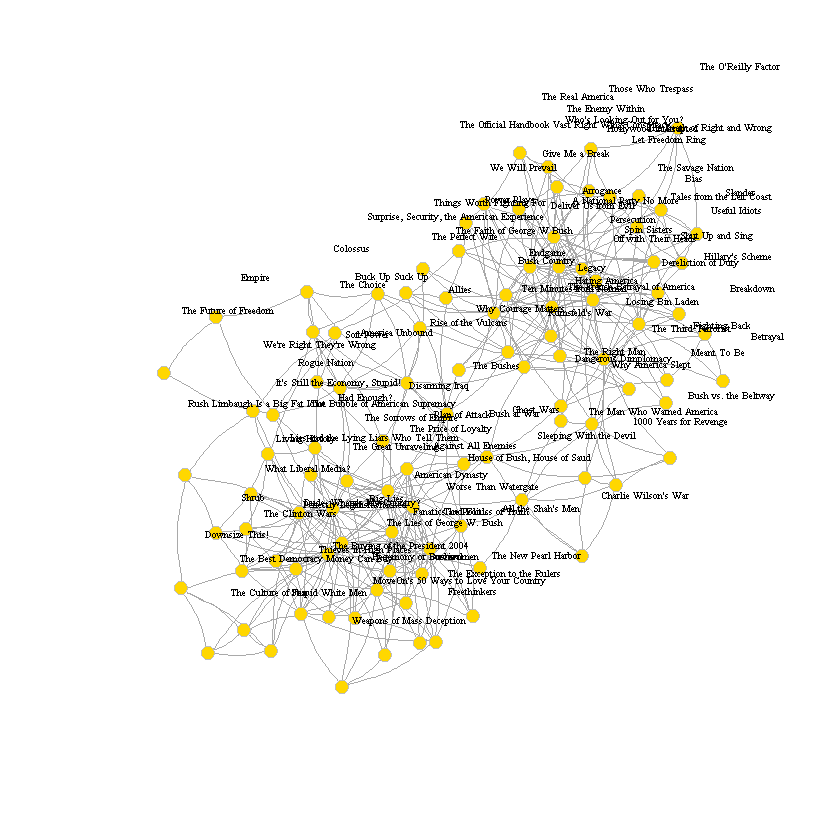

In [30]:
plot(df,edge.arrow.size=.5, vertex.color="gold", vertex.size=5, layout=layout_with_kk,
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.5, vertex.label.dist=1, edge.curved=0.2)

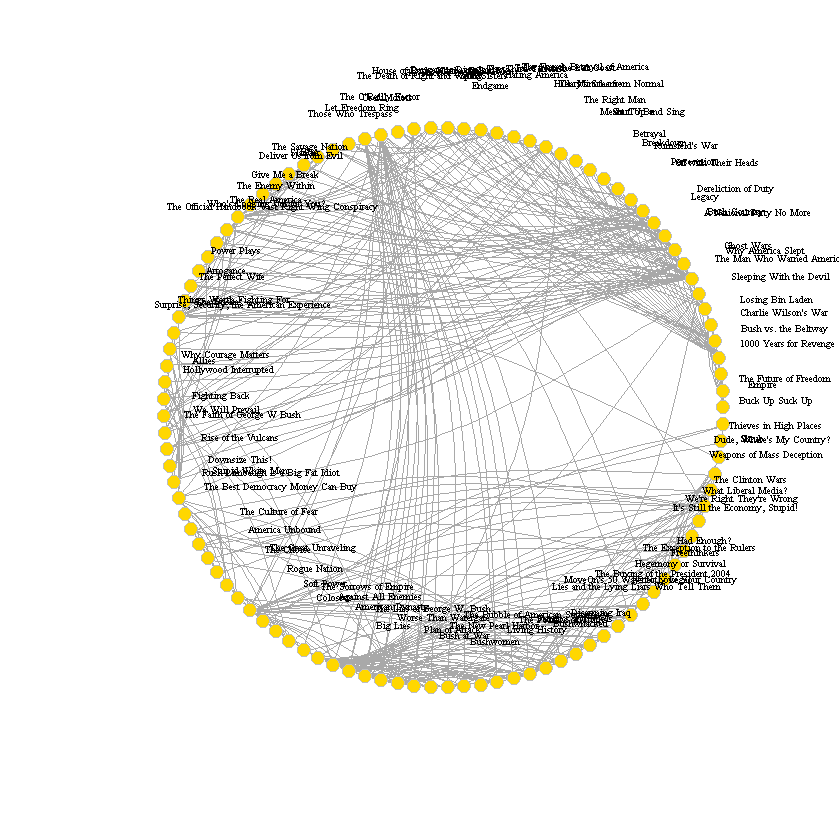

In [31]:
plot(df,edge.arrow.size=.5, vertex.color="gold", vertex.size=5, layout=layout_in_circle,
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.5, vertex.label.dist=1, edge.curved=0.2)

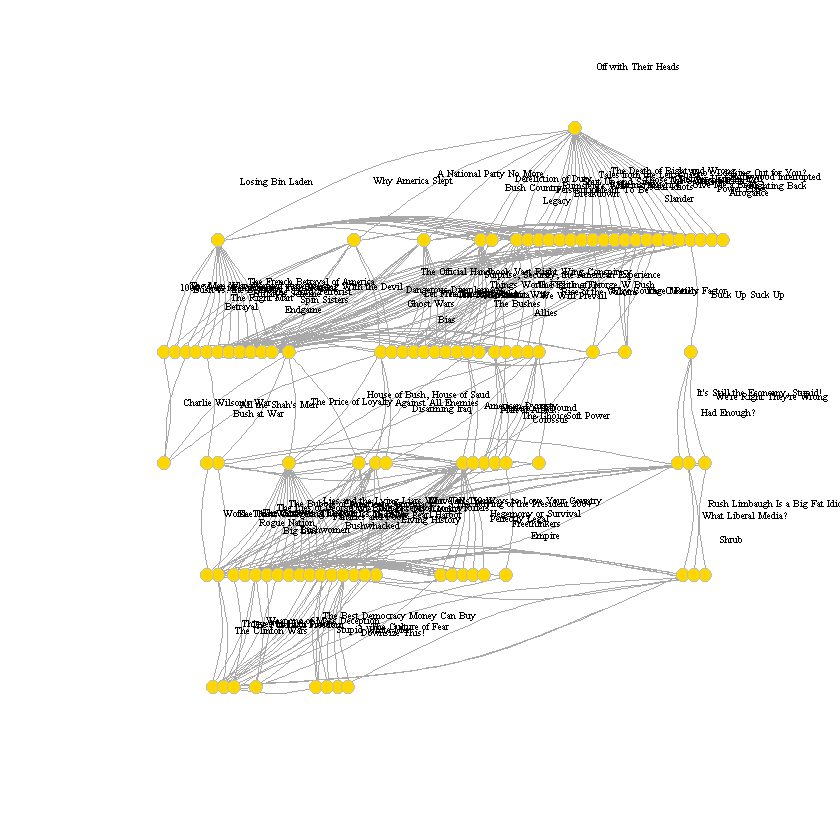

In [34]:
plot(df,edge.arrow.size=.5, vertex.color="gold", vertex.size=5, layout=layout_as_tree,
     vertex.frame.color="gray", vertex.label.color="black", 
     vertex.label.cex=0.5, vertex.label.dist=1, edge.curved=0.2)

In [41]:
summary(df)

IGRAPH U--- 105 441 -- 
+ attr: id (v/n), label (v/c), value (v/c)


In [43]:
summary(degree(df, mode="in"))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     5.0     6.0     8.4     9.0    25.0 

In [44]:
mean(V(df))
mean(E(df))

[1] 53

[1] 221

In [45]:
sd(V(df))
sd(E(df))

[1] 30.45488

[1] 127.45

In [47]:
var(V(df))
var(E(df))

[1] 927.5

[1] 16243.5

In [48]:
mean_distance(df, directed=F)

[1] 3.078755

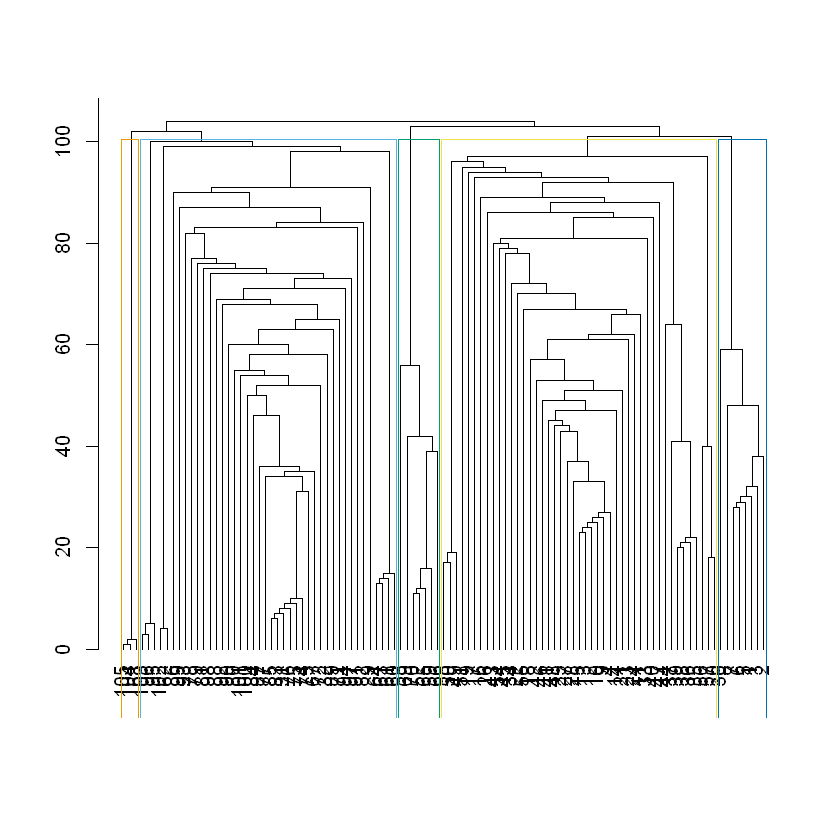

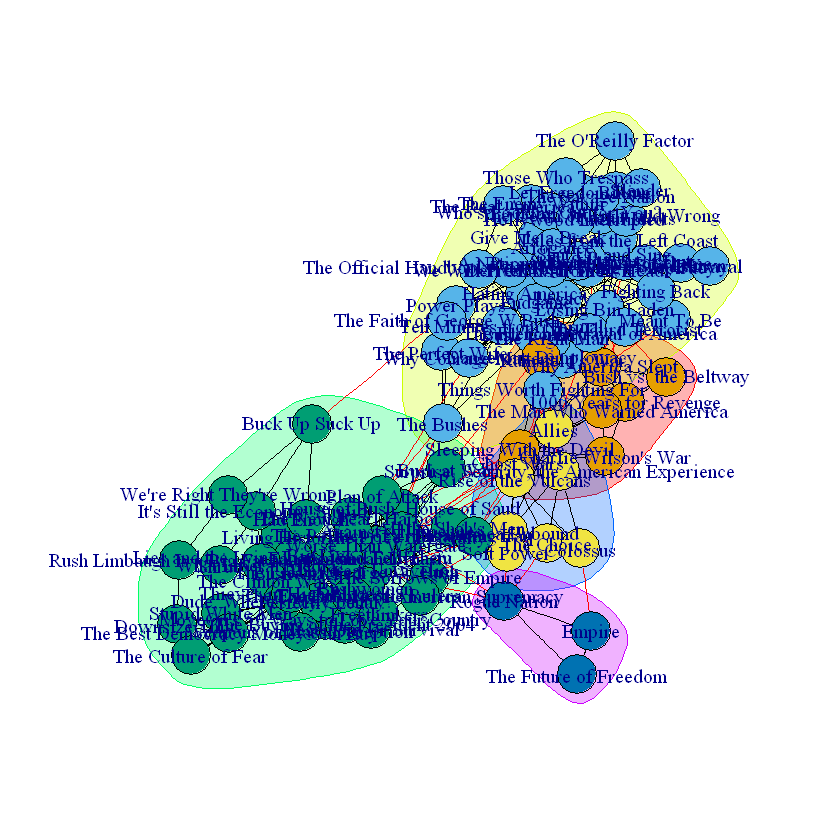

In [50]:
ceb <- cluster_edge_betweenness(df) 
dendPlot(ceb, mode="hclust")
plot(ceb, df)

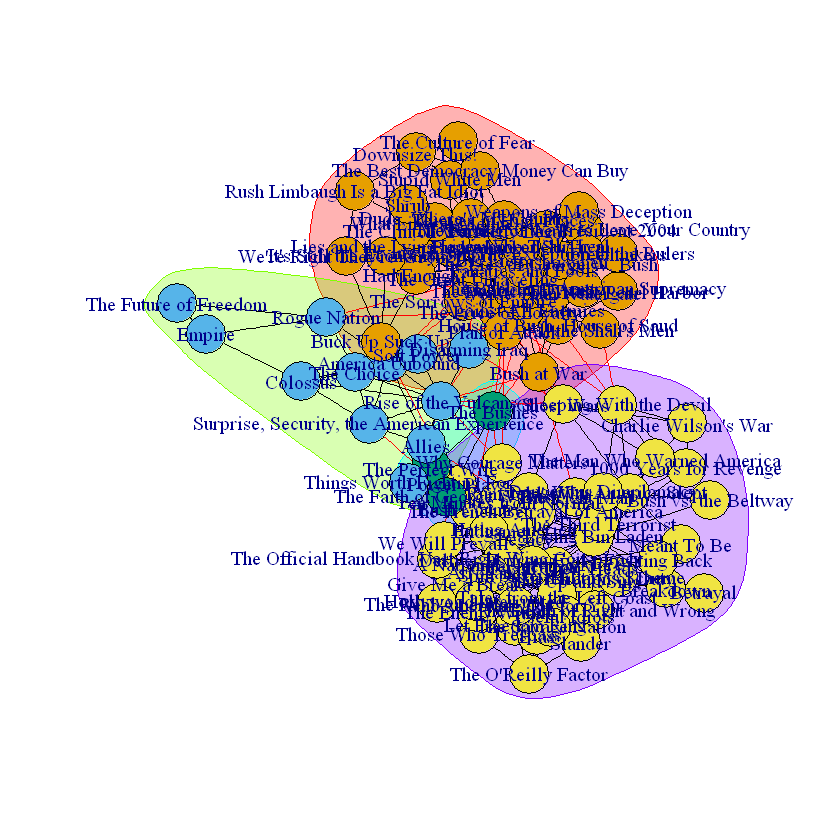

In [51]:
# Community detection based on greedy optimization of modularity
c_greedy <- cluster_fast_greedy(as.undirected(df))
plot(c_greedy, as.undirected(df))
 